# Face Recognition with Suport Vector Machines

In [ ]:
from time import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [ ]:
# get face image data
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

X, y = faces.data, faces.target
_, h, w = faces.images.shape
print("image size:", h, w)
X.shape

image size: 50 37


(1288, 1850)

In [ ]:
# derive train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Train a SVM classification model

clf = SVC(kernel="rbf", C=1, class_weight="balanced")
clf = clf.fit(X_train, y_train)

In [ ]:
# Predicting people's names on the test set
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)

for i, name in enumerate(faces.target_names):
    print("Accuracy for %17s: %.3f" % (name,accuracy_score(y_pred==i,y_test==i)))

Accuracy for      Ariel Sharon: 0.972
Accuracy for      Colin Powell: 0.929
Accuracy for   Donald Rumsfeld: 0.938
Accuracy for     George W Bush: 0.876
Accuracy for Gerhard Schroeder: 0.957
Accuracy for       Hugo Chavez: 0.969
Accuracy for        Tony Blair: 0.925


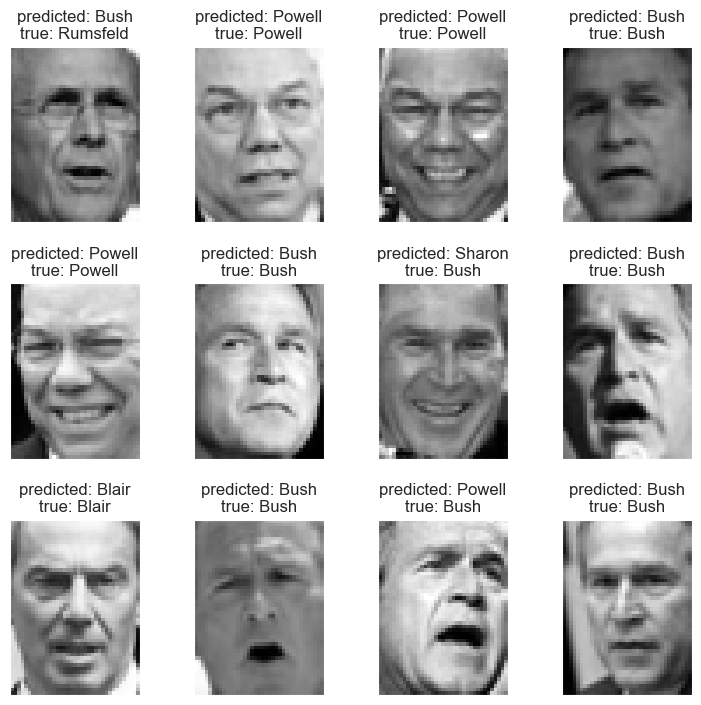

In [ ]:
import random 

def plot_gallery(images):
    """Helper function to plot a gallery of portraits"""
    n_row, n_col = 3,4
    
    names  = [n.rsplit(" ", 1)[-1] for n in faces.target_names]
    titles = ["predicted: %s\ntrue: %s" % (names[y_pred[i]], names[y_test[i]]) for i in range(len(y_pred))]

    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    j = 0
    for i in random.sample(range(len(images)),n_row * n_col):
        plt.subplot(n_row, n_col, j + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        j += 1

plot_gallery(X_test)

In [ ]:
# --->>> Your Turn <<<---
# Experiment with different kernel types and values for C
# - What do you observe?
# - Can you improve the performance?